In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('./policy_comparison.csv')

df.head()

,policy,trace,ipc
0,l3exclusive,bfs-10.trace.gz,0.228269
1,l3exclusive,bfs-14.trace.gz,0.282208
2,l3exclusive,bfs-3.trace.gz,0.251650
3,l3exclusive,bfs-8.trace.gz,0.302148
4,l3exclusive,bc-0.trace.gz,0.135770


### IPC at different policies

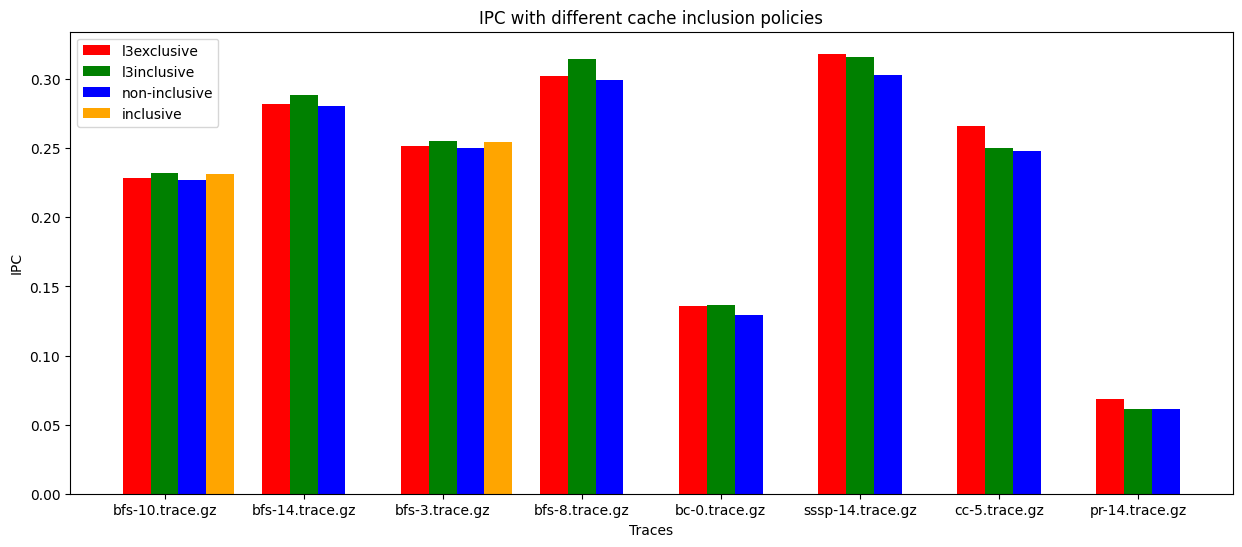

In [16]:
N = 8
ind = np.arange(N) 
width = 0.2
  
l3ex = []
l3inc = []
cache = []
inc = []
for i in range(len(df.index)):
    if df['policy'][i] == 'l3exclusive':
        l3ex.append(df['ipc'][i])
    elif df['policy'][i] == 'l3inclusive':
        l3inc.append(df['ipc'][i])
    elif df['policy'][i] == 'cache':
        cache.append(df['ipc'][i])
    else:
        inc.append(df['ipc'][i])

plt.figure(figsize=(15,6))
bar1 = plt.bar(ind, l3ex, width, color = 'r')
bar2 = plt.bar(ind+width, l3inc, width, color='g')
bar3 = plt.bar(ind+width*2, cache, width, color = 'b')
bar4 = plt.bar(ind+width*3, inc, width, color = 'orange')
  
plt.xlabel("Traces")
plt.ylabel('IPC')
plt.title("IPC with different cache inclusion policies")

plt.xticks(ind+width,df['trace'].unique())
plt.legend( (bar1, bar2, bar3, bar4), ('l3exclusive', 'l3inclusive', 'non-inclusive', 'inclusive') )
plt.savefig("ipc_policyComparison.jpg")
plt.show()

### Speed Up

Speed Up = $\frac{IPC_{new}}{IPC_{baseline}}$ , assuming baseline as (bimodal, no prefetcher, LRU, non-inclusive)

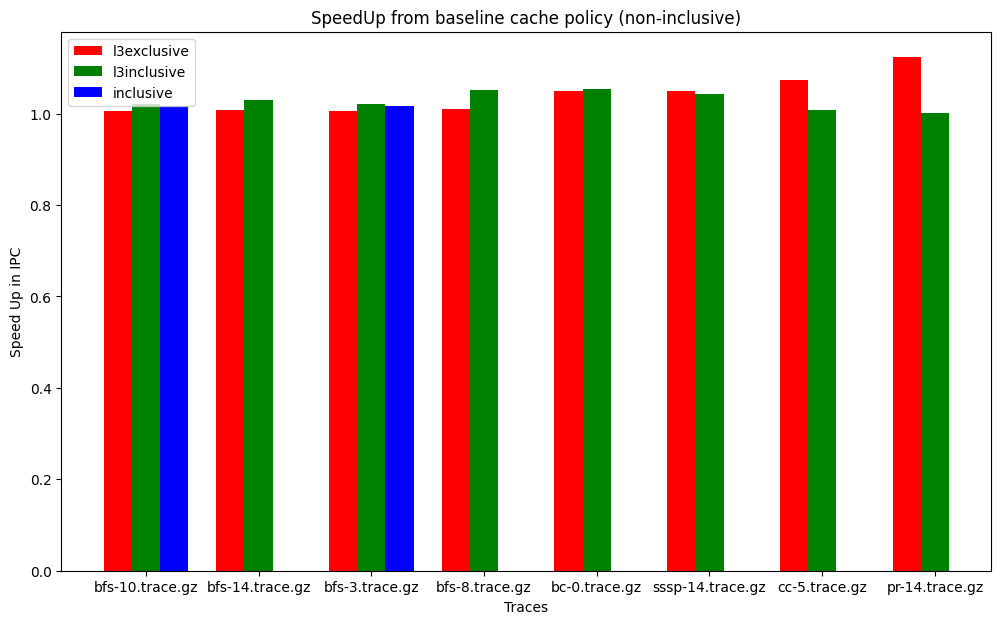

In [17]:
# Speedup

width = 0.25

l3ex = []
l3inc = []
cache = []
inc = []
for i in range(len(df.index)):
    if df['policy'][i] == 'l3exclusive':
        l3ex.append(df['ipc'][i])
    elif df['policy'][i] == 'l3inclusive':
        l3inc.append(df['ipc'][i])
    elif df['policy'][i] == 'cache':
        cache.append(df['ipc'][i])
    else:
        inc.append(df['ipc'][i])

for i in range(N):
    l3ex[i] = ((l3ex[i])/cache[i]) 
    l3inc[i] = ((l3inc[i])/cache[i]) 
    inc[i] = ((inc[i])/cache[i]) 

plt.figure(figsize=(12,7))
bar1 = plt.bar(ind, l3ex, width, color = 'r')
bar2 = plt.bar(ind+width, l3inc, width, color='g')
bar3 = plt.bar(ind+width*2, inc, width, color = 'b')
  
plt.xlabel("Traces")
plt.ylabel('Speed Up in IPC')
plt.title("SpeedUp from baseline cache policy (non-inclusive)")

plt.xticks(ind+width,df['trace'].unique())
plt.legend( (bar1, bar2, bar3), ('l3exclusive', 'l3inclusive', 'inclusive') )
plt.savefig("speedUp_policyComparison.jpg")
plt.show()

### Percentage Improvement

Improvement = $\frac{IPC_{new} - IPC_{baseline}}{IPC_{baseline}} * 100$ 

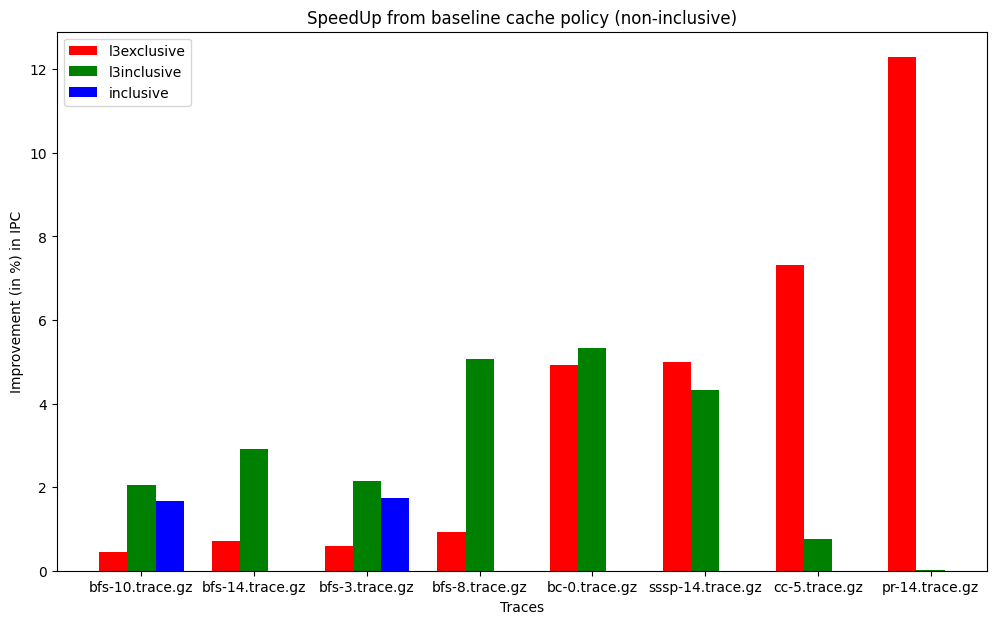

In [19]:
# Speedup

width = 0.25

l3ex = []
l3inc = []
cache = []
inc = []
for i in range(len(df.index)):
    if df['policy'][i] == 'l3exclusive':
        l3ex.append(df['ipc'][i])
    elif df['policy'][i] == 'l3inclusive':
        l3inc.append(df['ipc'][i])
    elif df['policy'][i] == 'cache':
        cache.append(df['ipc'][i])
    else:
        inc.append(df['ipc'][i])

for i in range(N):
    l3ex[i] = ((l3ex[i] - cache[i])/cache[i]) * 100
    l3inc[i] = ((l3inc[i] - cache[i])/cache[i]) * 100
    inc[i] = ((inc[i] - cache[i])/cache[i]) * 100

plt.figure(figsize=(12,7))
bar1 = plt.bar(ind, l3ex, width, color = 'r')
bar2 = plt.bar(ind+width, l3inc, width, color='g')
bar3 = plt.bar(ind+width*2, inc, width, color = 'b')
  
plt.xlabel("Traces")
plt.ylabel('Improvement (in %) in IPC')
plt.title("SpeedUp from baseline cache policy (non-inclusive)")

plt.xticks(ind+width,df['trace'].unique())
plt.legend( (bar1, bar2, bar3), ('l3exclusive', 'l3inclusive', 'inclusive') )
plt.savefig("speedUp_policyComparison.jpg")
plt.show()